In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

In [4]:
data_path=r'C:\Users\Suyash\Desktop\model\Training_Batch_Files'

In [5]:
dataframes=[]
for file in os.listdir(data_path):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_path,file))
        
        dataframes.append(df)


In [6]:
combined_df = pd.concat(dataframes,axis=0,ignore_index=True)

In [7]:
combined_df.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [66]:
len(combined_df)

3880

In [9]:
combined_df.isnull().sum()

Unnamed: 0       0
Sensor-1        16
Sensor-2        20
Sensor-3        35
Sensor-4        35
              ... 
Sensor-587       0
Sensor-588       0
Sensor-589       0
Sensor-590       0
Good/Bad      2343
Length: 592, dtype: int64

In [10]:
combined_df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
from sklearn.cluster import KMeans

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test=train_test_split(combined_df,test_size=0.3,random_state=20)

In [12]:
df1=combined_df

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Columns: 591 entries, Sensor-1 to Good/Bad
dtypes: float64(588), object(3)
memory usage: 17.5+ MB


In [15]:
df1['Sensor-1'].unique()

array([3034.74, 3038.57, 2902.88, ..., 3057.45, 2908.28, 3068.78])

In [47]:
for col in df1.columns:
    for i in range(0,len(df1)):
        if '24-03-1998' in str(df1[col].iloc[i]):
            print(col)

Sensor-332


In [17]:
for col in df1.columns:
    for i in range(0,len(df1)):
        if 'invalid' in str(df1[col].iloc[i]):
            df1[col].iloc[i]=np.nan

In [18]:
for col in df1.columns:
    for i in range(0,len(df1)):
        if 'string ' in str(df1[col].iloc[i]):
            df1[col].iloc[i]=np.nan

In [16]:
import numpy as np

In [19]:
for i in range(len(df1['Sensor-332'])):
    if '1998' in str(df1['Sensor-332'].iloc[i]):
        df1['Sensor-332'].iloc[i]=np.nan

In [20]:
for col in df1.columns:
    for i in range(0,len(df1)):
        if 'nan' in str(df1[col].iloc[i]):
            df1[col].iloc[i]=df1[col].mean()

In [22]:
X_train,X_test=train_test_split(df1,test_size=0.1,random_state=20)

In [23]:
wcss=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [41]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'wcss')

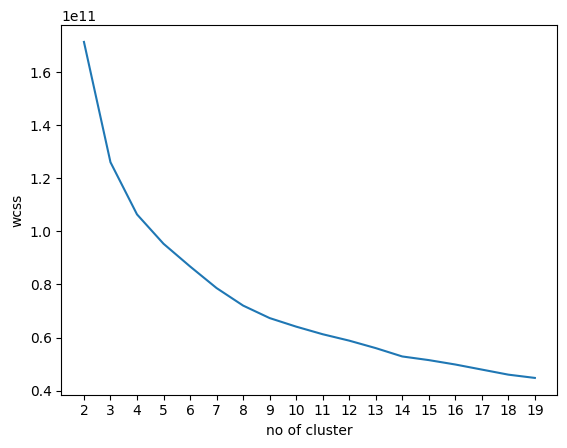

In [53]:
plt.plot(range(2,20),wcss)
plt.xticks(range(2,20))
plt.xlabel('no of cluster')
plt.ylabel('wcss')

In [24]:
from kneed import KneeLocator

In [25]:
k=KneeLocator(range(2,20),wcss,curve='convex',direction='decreasing')

In [26]:
k.elbow

7

In [27]:
kmeans=KMeans(n_clusters=7,init="k-means++")

In [28]:
y_label=kmeans.fit_predict(X_train)

In [30]:
y_label

array([6, 1, 2, ..., 2, 5, 4])

In [59]:
X_train

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
752,3058.890000,2504.38,2221.9444,1551.6947,1.5296,100.0,99.2678,0.1222,1.4068,0.0057,...,97.422749,0.5018,0.0460,0.0097,9.1677,-0.0012,0.0220,0.0072,0.0000,-0.88419
309,3013.699801,2651.37,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.5301,-0.0063,...,97.422749,0.5058,0.0104,0.0029,2.0538,-0.0012,0.0252,0.0081,0.0000,-1.00000
1867,3197.430000,2405.62,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3481,-0.0025,...,38.964200,0.5020,0.0127,0.0032,2.5214,0.0242,0.0094,0.0027,38.9642,-0.88419
778,2998.590000,2559.07,2184.8889,982.8147,1.0124,100.0,103.1656,0.1245,1.3933,-0.0229,...,97.422749,0.4991,0.0080,0.0023,1.6071,0.0123,0.0094,0.0026,76.4584,-0.88419
2499,2978.620000,2478.81,2236.0667,1680.1825,1.4834,100.0,98.6889,0.1221,1.4149,-0.0045,...,97.422749,0.4993,0.0121,0.0029,2.417,0.0297,0.0115,0.0040,38.7106,-1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,3018.810000,2281.30,2197.2333,1435.1460,0.9740,100.0,104.8733,0.1226,1.4458,0.0006,...,97.422749,0.4985,0.0144,0.0037,3.022087,0.0005,0.0115,0.0037,0.0000,-0.88419
3295,3057.650000,2540.35,2203.4556,1441.1445,0.8264,100.0,104.6767,0.1232,1.5527,-0.0216,...,97.422749,0.5010,0.0144,0.0035,2.8667,0.0419,0.0098,0.0032,23.3852,-1.00000
271,2924.540000,2451.31,2190.7666,3530.2362,0.8017,100.0,83.8767,0.1249,1.3207,-0.0116,...,61.400500,0.4985,0.0138,0.0036,2.7638,0.0148,0.0091,0.0028,61.4005,-0.88419
2522,3005.610000,2393.56,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.3898,-0.0229,...,97.422749,0.5010,0.0142,0.0039,2.8381,0.0106,0.0212,0.0064,200.1816,-1.00000


In [31]:
df2=X_train

In [32]:
df2['y_label']=y_label

In [62]:
df2

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad,y_label
752,3058.890000,2504.38,2221.9444,1551.6947,1.5296,100.0,99.2678,0.1222,1.4068,0.0057,...,0.5018,0.0460,0.0097,9.1677,-0.0012,0.0220,0.0072,0.0000,-0.88419,3
309,3013.699801,2651.37,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.5301,-0.0063,...,0.5058,0.0104,0.0029,2.0538,-0.0012,0.0252,0.0081,0.0000,-1.00000,0
1867,3197.430000,2405.62,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3481,-0.0025,...,0.5020,0.0127,0.0032,2.5214,0.0242,0.0094,0.0027,38.9642,-0.88419,4
778,2998.590000,2559.07,2184.8889,982.8147,1.0124,100.0,103.1656,0.1245,1.3933,-0.0229,...,0.4991,0.0080,0.0023,1.6071,0.0123,0.0094,0.0026,76.4584,-0.88419,1
2499,2978.620000,2478.81,2236.0667,1680.1825,1.4834,100.0,98.6889,0.1221,1.4149,-0.0045,...,0.4993,0.0121,0.0029,2.417,0.0297,0.0115,0.0040,38.7106,-1.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,3018.810000,2281.30,2197.2333,1435.1460,0.9740,100.0,104.8733,0.1226,1.4458,0.0006,...,0.4985,0.0144,0.0037,3.022087,0.0005,0.0115,0.0037,0.0000,-0.88419,4
3295,3057.650000,2540.35,2203.4556,1441.1445,0.8264,100.0,104.6767,0.1232,1.5527,-0.0216,...,0.5010,0.0144,0.0035,2.8667,0.0419,0.0098,0.0032,23.3852,-1.00000,1
271,2924.540000,2451.31,2190.7666,3530.2362,0.8017,100.0,83.8767,0.1249,1.3207,-0.0116,...,0.4985,0.0138,0.0036,2.7638,0.0148,0.0091,0.0028,61.4005,-0.88419,4
2522,3005.610000,2393.56,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.3898,-0.0229,...,0.5010,0.0142,0.0039,2.8381,0.0106,0.0212,0.0064,200.1816,-1.00000,2


In [33]:
df2['y_label'].value_counts()

2    1822
0     541
6     353
1     255
3     211
4     205
5     105
Name: y_label, dtype: int64

In [74]:
df2

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad,y_label
752,3058.890000,2504.38,2221.9444,1551.6947,1.5296,100.0,99.2678,0.1222,1.4068,0.0057,...,0.5018,0.0460,0.0097,9.1677,-0.0012,0.0220,0.0072,0.0000,-0.88419,3
309,3013.699801,2651.37,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.5301,-0.0063,...,0.5058,0.0104,0.0029,2.0538,-0.0012,0.0252,0.0081,0.0000,-1.00000,0
1867,3197.430000,2405.62,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3481,-0.0025,...,0.5020,0.0127,0.0032,2.5214,0.0242,0.0094,0.0027,38.9642,-0.88419,4
778,2998.590000,2559.07,2184.8889,982.8147,1.0124,100.0,103.1656,0.1245,1.3933,-0.0229,...,0.4991,0.0080,0.0023,1.6071,0.0123,0.0094,0.0026,76.4584,-0.88419,1
2499,2978.620000,2478.81,2236.0667,1680.1825,1.4834,100.0,98.6889,0.1221,1.4149,-0.0045,...,0.4993,0.0121,0.0029,2.417,0.0297,0.0115,0.0040,38.7106,-1.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,3018.810000,2281.30,2197.2333,1435.1460,0.9740,100.0,104.8733,0.1226,1.4458,0.0006,...,0.4985,0.0144,0.0037,3.022087,0.0005,0.0115,0.0037,0.0000,-0.88419,4
3295,3057.650000,2540.35,2203.4556,1441.1445,0.8264,100.0,104.6767,0.1232,1.5527,-0.0216,...,0.5010,0.0144,0.0035,2.8667,0.0419,0.0098,0.0032,23.3852,-1.00000,1
271,2924.540000,2451.31,2190.7666,3530.2362,0.8017,100.0,83.8767,0.1249,1.3207,-0.0116,...,0.4985,0.0138,0.0036,2.7638,0.0148,0.0091,0.0028,61.4005,-0.88419,4
2522,3005.610000,2393.56,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.3898,-0.0229,...,0.5010,0.0142,0.0039,2.8381,0.0106,0.0212,0.0064,200.1816,-1.00000,2


In [34]:
X=df2.drop('y_label',axis=1)
y=df2['y_label']

In [35]:
X.head(1)

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
752,3058.89,2504.38,2221.9444,1551.6947,1.5296,100.0,99.2678,0.1222,1.4068,0.0057,...,97.422749,0.5018,0.046,0.0097,9.1677,-0.0012,0.022,0.0072,0.0,-0.88419


In [37]:
y

752     6
309     1
1867    2
778     0
2499    0
       ..
2972    2
3295    0
271     2
2522    5
3427    4
Name: y_label, Length: 3492, dtype: int32

In [64]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.33,random_state=42)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
!pip install xgboost

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from xgboost import XGBClassifier

In [62]:
models={
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=50, random_state=1),
    'AdaBoostClassifier':AdaBoostClassifier(n_estimators=100, random_state=0),
    'BaggingClassifier':BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0),
    'GradientBoostingClassifier':GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    'VotingClassifier':VotingClassifier(
        estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('gnb', GaussianNB())],
        voting='hard')
    
}

In [46]:
from sklearn.metrics import accuracy_score

In [65]:


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train3,y_train3)
    score=model.score(X_train3,y_train3)
    print('training accuracy:',score)
    #Make Predictions
    y_pred3=model.predict(X_test3)

    accuracy=accuracy_score(y_test3,y_pred3)

    print(list(models.keys())[i])
    print(accuracy)
    print('*'*35)
    

training accuracy: 1.0
LogisticRegression
0.9913269731136166
***********************************
training accuracy: 0.17571611799914494
GaussianNB
0.1474414570685169
***********************************
training accuracy: 1.0
RandomForestClassifier
0.9470945359930616
***********************************
training accuracy: 0.7678495083368961
AdaBoostClassifier
0.7814397224631396
***********************************
training accuracy: 0.9739204788371099
BaggingClassifier
0.9635732870771899
***********************************
training accuracy: 0.9747755451047456
GradientBoostingClassifier
0.9531656548135299
***********************************
training accuracy: 1.0
VotingClassifier
0.9722463139635733
***********************************


In [55]:
y_pred3

array([0, 0, 0, 1, 2, 2, 4, 0, 6, 2, 2, 2, 0, 2, 2, 6, 1, 0, 2, 1, 2, 2,
       2, 3, 1, 2, 2, 2, 0, 2, 2, 3, 0, 3, 0, 2, 2, 2, 2, 1, 1, 2, 6, 1,
       3, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 6, 2,
       2, 0, 0, 1, 4, 1, 2, 2, 2, 2, 0, 6, 2, 1, 2, 2, 2, 2, 0, 6, 6, 2,
       2, 0, 3, 2, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 6, 2, 2, 2, 4, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 3, 6, 3, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 6, 3, 2, 1, 2, 2, 6,
       2, 2, 4, 0, 4, 2, 2, 2, 2, 4, 2, 2, 1, 5, 2, 2, 2, 6, 0, 0, 4, 0,
       2, 0, 6, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 6, 1, 2, 1, 0, 2, 2, 2, 2,
       0, 2, 2, 4, 2, 6, 6, 2, 0, 4, 4, 2, 1, 2, 0, 2, 0, 4, 4, 2, 4, 2,
       2, 6, 1, 2, 2, 6, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 4, 2, 0, 6, 2,
       0, 5, 2, 2, 2, 2, 2, 0, 1, 2, 5, 2, 3, 2, 2, 2, 2, 0, 3, 2, 4, 2,
       3, 1, 2, 2, 2, 2, 6, 2, 6, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 3, 2, 2,
       4, 2, 2, 5, 3, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,

In [57]:
model4=LogisticRegression()
model4.fit(X_train3,y_train3)
score=model4.score(X_train3,y_train3)
print('training accuracy:',score)
    #Make Predictions
y_pred4=model4.predict(X_test3)

accuracy=accuracy_score(y_test3,y_pred4)
accuracy

training accuracy: 1.0


0.9928469241773963

In [58]:
y_pred4

array([0, 5, 0, 1, 2, 2, 4, 0, 6, 0, 2, 2, 0, 2, 2, 6, 1, 0, 2, 1, 2, 2,
       2, 3, 1, 2, 2, 2, 0, 0, 2, 3, 0, 3, 0, 2, 2, 2, 6, 1, 5, 2, 6, 1,
       3, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 6, 2,
       2, 0, 0, 1, 5, 6, 2, 2, 2, 2, 0, 6, 2, 1, 2, 2, 2, 2, 0, 6, 6, 2,
       2, 0, 3, 2, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 6, 2, 2, 2, 4, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 4, 2, 0, 2, 2, 3, 6, 3, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 3, 2, 6, 3, 2, 1, 2, 2, 6,
       2, 2, 4, 0, 4, 2, 2, 2, 2, 5, 2, 2, 1, 4, 2, 2, 2, 6, 0, 0, 4, 0,
       2, 0, 6, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 6, 6, 2, 1, 0, 2, 2, 1, 2,
       0, 2, 2, 4, 2, 6, 6, 2, 1, 5, 4, 2, 6, 2, 0, 2, 0, 4, 4, 2, 4, 3,
       2, 6, 1, 2, 2, 6, 2, 2, 2, 2, 2, 0, 2, 0, 1, 3, 0, 5, 2, 0, 6, 2,
       0, 4, 2, 2, 2, 2, 2, 0, 5, 2, 5, 2, 1, 2, 2, 2, 2, 0, 3, 2, 4, 2,
       3, 1, 2, 2, 2, 2, 6, 2, 6, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 3, 2, 2,
       4, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,

In [61]:
np.array(y_test3)

array([0, 5, 0, 1, 2, 2, 4, 0, 6, 2, 2, 2, 0, 2, 2, 6, 1, 0, 2, 1, 2, 2,
       2, 3, 1, 2, 2, 2, 0, 2, 2, 3, 0, 3, 0, 2, 2, 2, 6, 1, 5, 2, 6, 1,
       3, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 6, 2,
       2, 0, 0, 1, 5, 6, 2, 2, 2, 2, 0, 6, 2, 1, 2, 2, 2, 2, 0, 6, 6, 2,
       2, 0, 3, 2, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 6, 2, 2, 2, 4, 1,
       6, 2, 2, 2, 1, 2, 2, 2, 0, 2, 4, 2, 0, 2, 2, 3, 6, 3, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 3, 2, 6, 3, 2, 1, 2, 2, 6,
       2, 2, 4, 0, 4, 2, 2, 2, 2, 5, 2, 2, 1, 4, 2, 2, 2, 6, 0, 0, 4, 0,
       2, 0, 6, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 6, 6, 2, 1, 0, 2, 2, 1, 2,
       0, 2, 2, 4, 2, 6, 6, 2, 1, 5, 4, 2, 6, 2, 0, 2, 0, 4, 4, 2, 4, 3,
       2, 6, 1, 2, 2, 6, 2, 2, 2, 2, 2, 0, 2, 0, 1, 3, 0, 5, 2, 0, 6, 2,
       0, 4, 2, 2, 2, 2, 2, 0, 5, 2, 5, 2, 3, 2, 2, 2, 2, 0, 3, 2, 4, 2,
       3, 1, 2, 2, 2, 2, 6, 2, 6, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 3, 2, 2,
       4, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,